In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Intro: Importing and Cleaning The Data

In [58]:
df = pd.read_csv("employee-attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Splitting The Data

In [59]:
df2 = df[["Attrition", "JobSatisfaction", "YearsAtCompany", "NumCompaniesWorked", "TotalWorkingYears"]]
sample1 = pd.get_dummies(df["Gender"])
sample2 = pd.get_dummies(df["JobRole"])
sample3 = pd.get_dummies(df["OverTime"])
df3 = pd.concat([df2, sample1, sample2, sample3], axis=1)
df3.head()

,Attrition,JobSatisfaction,YearsAtCompany,NumCompaniesWorked,TotalWorkingYears,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,No,Yes
0,Yes,4,6,8,8,1,0,0,0,0,0,0,0,0,1,0,0,1
1,No,2,10,1,10,0,1,0,0,0,0,0,0,1,0,0,1,0
2,Yes,3,0,6,7,0,1,0,0,1,0,0,0,0,0,0,0,1
3,No,3,8,1,8,1,0,0,0,0,0,0,0,1,0,0,0,1
4,No,2,2,9,6,0,1,0,0,1,0,0,0,0,0,0,1,0


In [60]:
X = df3[["NumCompaniesWorked", "JobSatisfaction", "YearsAtCompany", "TotalWorkingYears", "Female", "Male",
         "Healthcare Representative", "Human Resources", "Laboratory Technician", "Manager", "Manufacturing Director",
         "Research Director", "Research Scientist", "Sales Executive", "No", "Yes"]]
y = df3['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,NumCompaniesWorked,JobSatisfaction,YearsAtCompany,TotalWorkingYears,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,No,Yes
99,4,2,3,17,0,1,0,0,1,0,0,0,0,0,1,0
785,4,4,11,14,0,1,1,0,0,0,0,0,0,0,1,0
918,4,2,29,31,0,1,0,0,0,1,0,0,0,0,0,1
1335,8,4,2,7,0,1,0,0,0,0,0,0,1,0,1,0
1182,0,3,3,4,1,0,0,0,0,0,1,0,0,0,1,0


Exploratory Data Analysis

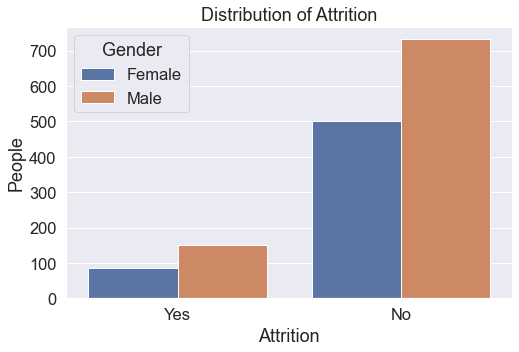

In [61]:
sns.countplot(x=df['Attrition'].dropna(), hue=df['Gender'].dropna())
plt.title('Distribution of Attrition')
plt.ylabel("People")
plt.show()

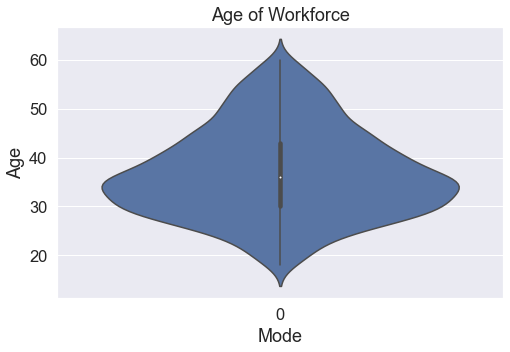

In [62]:
sns.violinplot(data=df["Age"])
plt.title('Age of Workforce')
plt.ylabel('Age')
plt.xlabel('Mode')
plt.show()

[Text(0.5, 0, 'Job Department'), Text(0, 0.5, 'Amount')]

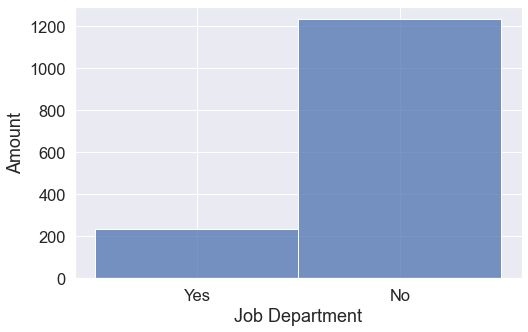

In [63]:
sns.set(style="darkgrid", palette="deep", font_scale=1.5, rc={"figure.figsize":[8,5]})
sns.histplot(df["Attrition"]).set(xlabel="Job Department", ylabel="Amount")

In [64]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Training The Algorithm

In [65]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.8231292517006803

In [66]:
y_prediction = rf.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
cm = pd.DataFrame(cm, index=['No Attrition (actual)', 'Attrition (actual)'], columns = ['No Attrition (prediction)', 'Attrition (prediction)'])
# Labeling the data frame
cm

,No Attrition (prediction),Attrition (prediction)
No Attrition (actual),346,18
Attrition (actual),60,17


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

          No       0.85      0.95      0.90       364
         Yes       0.49      0.22      0.30        77

    accuracy                           0.82       441
   macro avg       0.67      0.59      0.60       441
weighted avg       0.79      0.82      0.79       441



Conclusion
 Predicting attrition is a tough procedure due to the subjectivity that is normally included, the conclusion of this model is inadequate. To account for the complexity of quantifying attrition, the model should possibly be recreated with a new set of variables, or even a higher number of variables.